In [92]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)


In [93]:
from keras.datasets import mnist

In [94]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [95]:
print(x_train_image.shape)

(60000, 28, 28)


In [96]:
print(y_train_label.shape)

(60000,)


In [97]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap = "binary")
    plt.show()

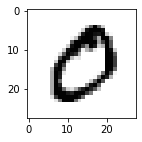

In [98]:
plot_image(x_train_image[1])

In [99]:
y_train_label[1]

0

In [100]:
import matplotlib.pyplot as plt
def plot_image_label_prediction(image,label,prediction,index,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
    for i in range(0, num):
        plots = plt.subplot(5, 5, 1+i)
        plots.imshow(image[index], cmap = "binary")
        title = "label=" + str(label[index])
        if len(prediction) > 0:
            title = title + ",predict=" + str(prediction[index])
        plots.set_title(title, fontsize = 10)
        index +=1
    plt.show()

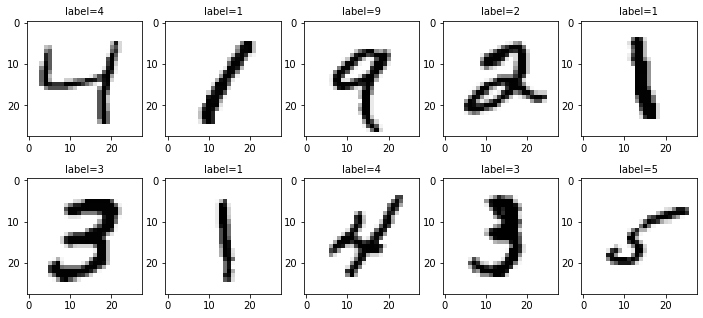

In [101]:
plot_image_label_prediction(x_train_image, y_train_label, [], 2, 10)

In [20]:
print(x_test_image.shape)
print(y_test_label.shape)

(10000, 28, 28)
(10000,)


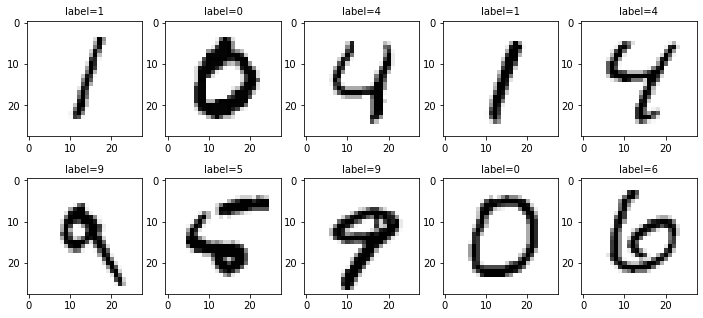

In [102]:
plot_image_label_prediction(x_test_image, y_test_label, [], 2, 10)

In [103]:
x_train = x_train_image.reshape(60000, 784).astype("float32")
x_test = x_test_image.reshape(10000, 784).astype("float32")

In [104]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [105]:
print(x_train_image.max())
print(x_test_image.max())

255
255


In [106]:
x_train_norm = x_train/ 255
x_test_norm = x_test/ 255

In [107]:
print(x_train_norm[1].max())

1.0


In [108]:
y_train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [109]:
y_train_oh = np_utils.to_categorical(y_train_label)
y_test_oh = np_utils.to_categorical(y_test_label)

In [110]:
print(y_train_oh.max())

1.0


In [111]:
print(y_train_oh[:5])
print(y_train_label[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[5 0 4 1 9]


In [112]:
 from keras.models import Sequential 


In [131]:
from keras.layers import Dense
from keras.layers import Dropout

In [132]:
model = Sequential()

In [133]:
model.add(Dense(units = 1000, input_dim = 784, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1000, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.5))

In [135]:
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

In [136]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [138]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [139]:
train_history = model.fit(x_train_norm, y_train_oh, validation_split = 0.2, epochs = 10, batch_size = 200, verbose = 2)

Epoch 1/10
240/240 - 20s - loss: 0.3663 - accuracy: 0.8867 - val_loss: 0.1415 - val_accuracy: 0.9576
Epoch 2/10
240/240 - 19s - loss: 0.1605 - accuracy: 0.9511 - val_loss: 0.1065 - val_accuracy: 0.9696
Epoch 3/10
240/240 - 20s - loss: 0.1176 - accuracy: 0.9630 - val_loss: 0.0906 - val_accuracy: 0.9724
Epoch 4/10
240/240 - 24s - loss: 0.0979 - accuracy: 0.9693 - val_loss: 0.0840 - val_accuracy: 0.9759
Epoch 5/10
240/240 - 25s - loss: 0.0851 - accuracy: 0.9729 - val_loss: 0.0768 - val_accuracy: 0.9772
Epoch 6/10
240/240 - 22s - loss: 0.0729 - accuracy: 0.9767 - val_loss: 0.0738 - val_accuracy: 0.9772
Epoch 7/10
240/240 - 23s - loss: 0.0667 - accuracy: 0.9787 - val_loss: 0.0778 - val_accuracy: 0.9786
Epoch 8/10
240/240 - 24s - loss: 0.0594 - accuracy: 0.9815 - val_loss: 0.0777 - val_accuracy: 0.9790
Epoch 9/10
240/240 - 24s - loss: 0.0563 - accuracy: 0.9816 - val_loss: 0.0775 - val_accuracy: 0.9787
Epoch 10/10
240/240 - 25s - loss: 0.0490 - accuracy: 0.9843 - val_loss: 0.0732 - val_accura

In [120]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.xlabel('epoch')
    plt.ylabel('train')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

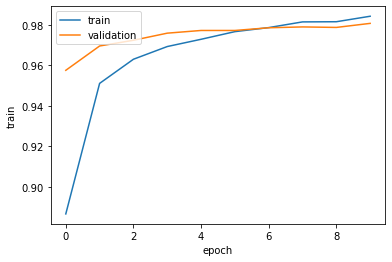

In [140]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

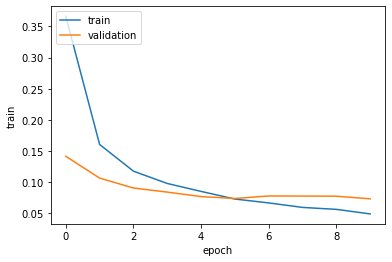

In [141]:
show_train_history(train_history, 'loss', 'val_loss')

In [142]:
scores = model.evaluate(x_train_norm, y_train_oh)
print("loss=" + str(scores[0]))
print("accuracy=" + str(scores[1]))

1875/1875 [==============================] - 22s 12ms/step - loss: 0.0256 - accuracy: 0.9929
loss=0.02561909705400467
accuracy=0.992900013923645


In [143]:
prediction = model.predict_classes(x_test)

In [144]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

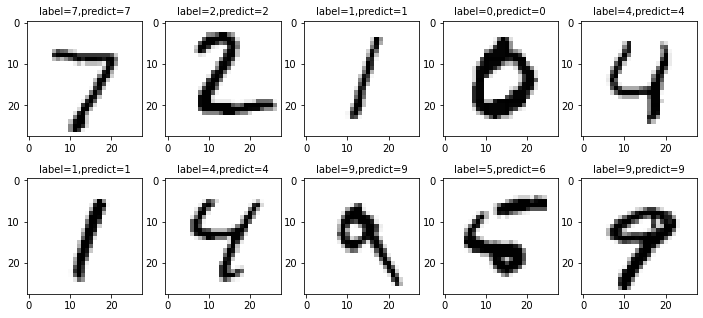

In [145]:
plot_image_label_prediction(x_test_image, y_test_label, prediction, 0, 10)

In [146]:
import pandas as pd
pd.crosstab(y_test_label, prediction, rownames = ['label'], colnames = ['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,1,0,1,1,1,1,1
1,1,1128,2,0,0,1,1,1,1,0
2,3,1,1012,3,2,0,1,6,3,1
3,0,0,2,998,0,0,0,4,3,3
4,2,2,2,0,965,0,3,1,0,7
5,3,0,0,15,1,859,6,0,4,4
6,5,2,0,1,7,3,940,0,0,0
7,0,2,8,1,0,0,0,1016,0,1
8,2,1,4,9,3,6,2,3,940,4


In [147]:
df = pd.DataFrame({'label' : y_test_label, 'predict' : prediction})
df[:20]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [152]:
df[(df.label == 0) & (df.predict == 2)]

,label,predict
4065,0,2


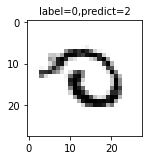

In [153]:
plot_image_label_prediction(x_test_image, y_test_label, prediction, 4065, 1)

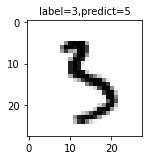

In [86]:
plot_image_label_prediction(x_test_image, y_test_label, prediction, 3943, 1)

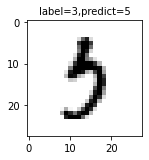

In [87]:
plot_image_label_prediction(x_test_image, y_test_label, prediction, 4740, 1)